# PROJETO INTEGRADOR

### IMPORTANDO BIBLIOTECAS NECESSÁRIAS

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate


# EDA - Exploratory Data Analysis

In [114]:
df = pd.read_excel('base modelo.xlsx')
df

,ID,Country,Code,ContinentCode,Year,Economic growth: the rate of change of real GDP,"External debt, percent of Gross National Income",Economic growth forecast,"Access to electricity, percent of the population",Innovations index (0-100),...,"Trade balance, billion USD",Inflation forecast,"Kidnappings per 100,000 people","Robberies per 100,000 people","Number of prisoners per 100,000 people","Homicides per 100,000 people",Energia Renovável,Unemployment rate - desemprego,Representatividade Feminina,"Tertiary school enrollment, percent of all eligible children"
0,2017ARG,Argentina,ARG,SA,2017,2.82,36.02,2.82,100.00,32.00,...,-15.14,24.80,920.00,920.00,193.00,5.1,25189.6,8.35,57.80,89.96
1,2017BOL,Bolivia,BOL,SA,2017,4.20,35.69,4.20,91.80,25.60,...,-2.17,2.72,432.57,432.57,242.57,8.0,25189.6,3.65,68.60,72.54
2,2017BRA,Brazil,BRA,SA,2017,1.32,26.82,1.32,99.80,33.10,...,19.00,2.95,432.57,432.57,242.57,8.0,25189.6,12.82,64.06,51.57
3,2017CHL,Chile,CHL,SA,2017,1.18,39.00,1.31,99.70,38.70,...,3.53,2.25,633.00,633.00,231.00,4.3,25189.6,6.96,64.06,88.46
4,2017COL,Colombia,COL,SA,2017,1.36,41.08,1.36,98.50,34.80,...,-8.76,4.06,244.00,244.00,244.00,24.9,25189.6,8.87,66.90,56.43
5,2017ECU,Ecuador,ECU,SA,2017,2.37,40.41,2.37,99.20,29.10,...,-0.49,-0.20,457.00,457.00,226.00,5.8,25189.6,3.84,70.40,72.54
6,2017HTI,Haiti,HTI,NaN,2017,2.51,14.38,2.51,43.75,30.56,...,0.64,7.93,432.57,432.57,242.57,8.0,25189.6,8.13,64.06,72.54
7,2017PER,Peru,PER,SA,2017,2.52,33.58,2.52,94.80,32.90,...,5.27,1.37,223.00,223.00,278.00,7.7,25189.6,3.69,56.60,70.74
8,2017PRY,Paraguay,PRY,SA,2017,4.81,42.24,4.81,99.30,30.30,...,1.60,4.49,29.00,29.00,206.00,0.0,25189.6,4.61,64.06,72.54
9,2017URY,Uruguay,URY,SA,2017,1.63,39.00,1.63,99.80,34.50,...,3.50,6.55,522.00,522.00,320.00,8.2,25189.6,7.89,64.06,63.13


In [115]:
df.columns

Index(['ID', 'Country', 'Code', 'ContinentCode', 'Year',
       'Economic growth: the rate of change of real GDP',
       'External debt, percent of Gross National Income',
       'Economic growth forecast',
       'Access to electricity, percent of the population',
       'Innovations index (0-100)',
       'Research and development expenditure, percent of GDP',
       'Information technology exports, percent of total goods exports',
       'High technology exports',
       'High tech exports, percent of manufactured exports',
       'Patent applications by residents',
       'Gross Domestic Product, billions of U.S. dollars',
       'GDP per capita, current U.S. dollars',
       'Foreign Direct Investment, percent of GDP',
       'Short-term debt, percent of total external debt',
       'Short-term external debt, percent of international reserves',
       'Government spending as percent of GDP',
       'Government spending, billion USD', 'Government debt as percent of GDP',
       'C

In [116]:
todas = ['Innovations index (0-100)',
         'Information technology exports, percent of total goods exports',
          'GDP per capita, current U.S. dollars',
           'Foreign Direct Investment, percent of GDP',
          'Competitiveness - World Economic Forum index (0-100)',
          'Cost of starting a business, % of income per capita',
          'Human Development Index (0 - 1)']

var_num = ['Information technology exports, percent of total goods exports',
          'GDP per capita, current U.S. dollars',
           'Foreign Direct Investment, percent of GDP',
          'Competitiveness - World Economic Forum index (0-100)',
          'Cost of starting a business, % of income per capita',
          'Human Development Index (0 - 1)']

var_targ = ['Innovations index (0-100)']

In [117]:
features = list(var_num)

In [118]:
len(features)

6

In [119]:
X = df[features]
y = df[var_targ]

In [120]:
X.shape, y.shape

((39, 6), (39, 1))

In [121]:
def get_missing_values(pdf):
        """
        Retorna um Pandas Series com as colunas que tem ao
        menos um missing value.
        """
        
        missing = pdf.isnull().sum()
        return missing[missing > 0]
    
get_missing_values(df)

ContinentCode    4
dtype: int64

# Análise de Correlação entre as principais variáveis

In [122]:
corr = df[todas].corr()
corr

,Innovations index (0-100),"Information technology exports, percent of total goods exports","GDP per capita, current U.S. dollars","Foreign Direct Investment, percent of GDP",Competitiveness - World Economic Forum index (0-100),"Cost of starting a business, % of income per capita",Human Development Index (0 - 1)
Innovations index (0-100),1.000000,0.530810,0.722786,0.779107,0.641144,-0.584286,0.674479
"Information technology exports, percent of total goods exports",0.530810,1.000000,0.189290,0.568580,0.449955,-0.490662,0.226773
"GDP per capita, current U.S. dollars",0.722786,0.189290,1.000000,0.463872,0.527548,-0.428587,0.810267
"Foreign Direct Investment, percent of GDP",0.779107,0.568580,0.463872,1.000000,0.482916,-0.501028,0.407015
Competitiveness - World Economic Forum index (0-100),0.641144,0.449955,0.527548,0.482916,1.000000,-0.558528,0.539187
"Cost of starting a business, % of income per capita",-0.584286,-0.490662,-0.428587,-0.501028,-0.558528,1.000000,-0.592477
Human Development Index (0 - 1),0.674479,0.226773,0.810267,0.407015,0.539187,-0.592477,1.000000


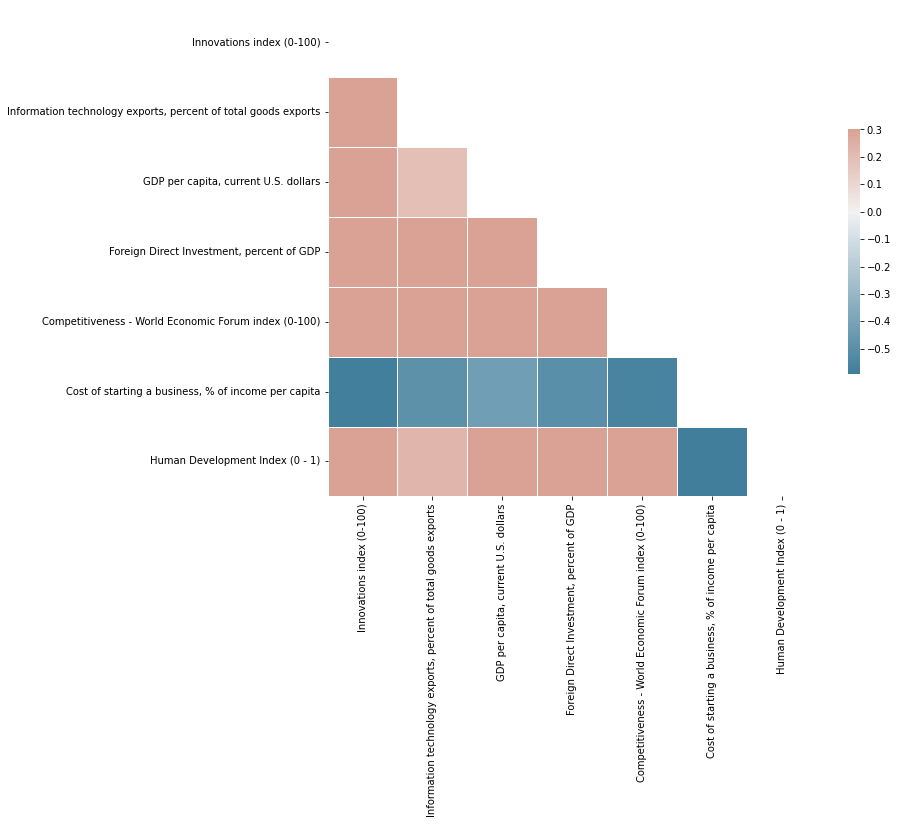

In [123]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Divisão do DF em Treino e Teste

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(39, 31, 8, 31, 8)

In [125]:
X_train.head()

,"Information technology exports, percent of total goods exports","GDP per capita, current U.S. dollars","Foreign Direct Investment, percent of GDP",Competitiveness - World Economic Forum index (0-100),"Cost of starting a business, % of income per capita",Human Development Index (0 - 1)
11,0.08,3548.59,0.75,51.40,39.2,0.703
27,0.06,7023.08,2.08,61.70,9.4,0.759
18,0.07,5782.78,0.48,53.40,58.4,0.724
15,0.08,6295.93,1.29,55.80,33.3,0.758
2,0.36,9928.68,3.34,59.51,4.8,0.760


# SCALING DOS DADOS

In [126]:
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [127]:
mm_scaler =  MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)

In [128]:
X_train

array([[0.125     , 0.02637822, 0.50394737, 0.        , 0.65529623,
        0.02040816],
       [0.0625    , 0.24959029, 0.67894737, 0.53926702, 0.12028725,
        0.40136054],
       [0.09375   , 0.16990955, 0.46842105, 0.10471204, 1.        ,
        0.16326531],
       [0.125     , 0.20287591, 0.575     , 0.23036649, 0.54937163,
        0.39455782],
       [1.        , 0.43625509, 0.84473684, 0.42460733, 0.03770197,
        0.40816327],
       [0.375     , 0.11754563, 0.43947368, 0.42460733, 0.33500898,
        0.19047619],
       [0.09375   , 0.44574251, 0.59868421, 0.30366492, 0.04129264,
        0.88435374],
       [0.375     , 0.36910112, 0.66842105, 0.42460733, 0.33500898,
        0.47619048],
       [0.375     , 0.36910112, 0.66842105, 0.42460733, 0.33500898,
        0.47619048],
       [0.375     , 0.15995123, 0.55131579, 0.42460733, 0.33500898,
        0.40136054],
       [0.09375   , 0.16323405, 0.57368421, 0.42460733, 0.99640934,
        0.14965986],
       [0.75      , 0

In [129]:
X_test = mm_scaler.transform(X_test)

In [130]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modelo: Linear Regression

In [165]:
regr = LinearRegression(normalize=True)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))

0.8039111579030407


In [132]:
y_pred_LR = regr.predict(X_train)

In [166]:
#Erro quadrático médio (parâmetro squared = falso)
mean_squared_error(y_true = y_train, y_pred = y_pred_LR, squared=False)

1.8267297905142759

In [134]:
y_train.describe()

,Innovations index (0-100)
count,31.000000
mean,30.536774
std,4.193417
min,22.400000
25%,28.500000
50%,30.560000
75%,33.050000
max,38.700000


In [135]:
#Cross Validation
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=5)
scores

array([0.59807053, 0.49715508, 0.71193669, 0.11892365, 0.02152319])

In [162]:
regr.coef_

array([[ 0.46882335,  1.17035141,  1.69026295,  0.42032713, -0.04720462,
         0.81750788]])

In [136]:
explainer = shap.Explainer(regr.predict, X_test)
shap_values = explainer(X_train)

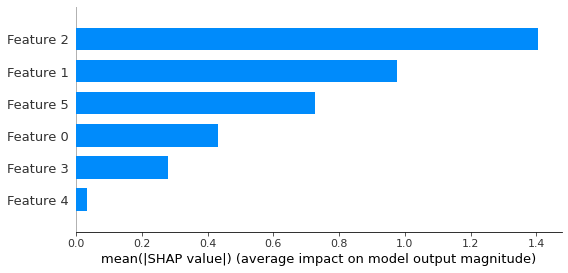

In [137]:
plt.figure(figsize = (15,8))
ax = shap.summary_plot(shap_values, 
                       df[var_num],
                       plot_type='bar')
plt.show()

### Modelo: regressão com RidgeCV

In [138]:
clf = RidgeCV(alphas=[0.01, 0.05, 0.1, 0.5], cv = 10 ).fit(X_train, y_train)
clf.score(X_train, y_train)

0.8038490981328353

In [139]:
y_pred_test_ridg = clf.predict(X_test)
y_pred_test_ridg

array([[32.85500252],
       [26.44479061],
       [34.40536868],
       [34.88242861],
       [31.83766484],
       [27.57472678],
       [32.2466258 ],
       [33.49565159]])

In [140]:
mean_squared_error(y_true = y_test, y_pred = y_pred_test_ridg, squared=False)

1.1011416245487198

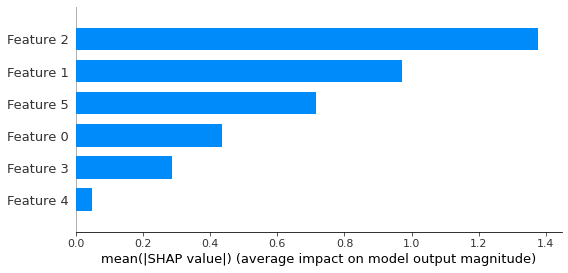

In [141]:
explainer_ridg = shap.Explainer(clf.predict, X_test)
shap_values_ridg = explainer_ridg(X_train)

plt.figure(figsize = (15,8))
ax = shap.summary_plot(shap_values_ridg, 
                       df[var_num],
                       plot_type='bar')
plt.show()

In [178]:
P = clf.predict( X_test)

In [179]:
P

array([[32.85500252],
       [26.44479061],
       [34.40536868],
       [34.88242861],
       [31.83766484],
       [27.57472678],
       [32.2466258 ],
       [33.49565159]])

In [183]:
mean_squared_error(y_test, P, squared=False)

1.1011416245487198

### Modelo: SGDRegressor

In [142]:
linreg_model = SGDRegressor(loss='squared_loss',
                            learning_rate='constant',
                            max_iter=10,
                            eta0=0.01,
                            verbose=1,
                            tol=None,
                            random_state=0)

In [143]:
linreg_model.fit(X_train, y_train)

-- Epoch 1
Norm: 2.26, NNZs: 6, Bias: 8.269330, T: 31, Avg. loss: 369.678553
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.82, NNZs: 6, Bias: 14.326776, T: 62, Avg. loss: 196.372766
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.74, NNZs: 6, Bias: 18.711737, T: 93, Avg. loss: 105.109846
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.80, NNZs: 6, Bias: 21.972668, T: 124, Avg. loss: 57.586377
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.05, NNZs: 6, Bias: 24.296757, T: 155, Avg. loss: 31.217339
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.97, NNZs: 6, Bias: 26.009010, T: 186, Avg. loss: 17.330588
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.07, NNZs: 6, Bias: 27.260660, T: 217, Avg. loss: 10.008551
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.15, NNZs: 6, Bias: 28.176857, T: 248, Avg. loss: 6.074708
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.13, NNZs: 6, Bias: 28.831446, T: 279, Avg. loss: 4.014056
Total training time: 

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SGDRegressor(learning_rate='constant', max_iter=10, random_state=0, tol=None,
             verbose=1)

In [144]:
y_pred_SGDR = linreg_model.predict(X_test)

In [145]:
print(f'RMSE = {mean_squared_error(y_test, y_pred_SGDR, squared=False)}')

RMSE = 1.5693147649435306


In [146]:
explainer_SGDR = shap.Explainer(linreg_model.predict, X_test)
shap_values_SGDR = explainer_SGDR(X_train)

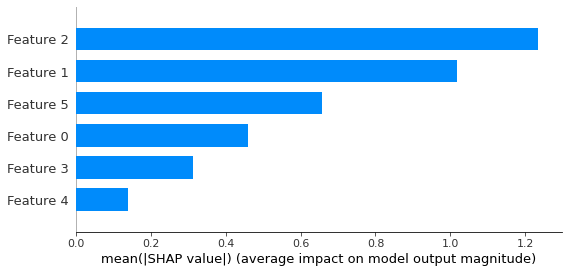

In [147]:
plt.figure(figsize = (15,8))
ax = shap.summary_plot(shap_values_SGDR, 
                       df[var_num],
                       plot_type='bar',
                      title='Feature Importance')
plt.show()

# COMPARAÇÃO ENTRE OS MODELOS

## RMSE

In [148]:
print(f'Modelo: Linear Regression - RMSE = {mean_squared_error(y_true = y_train, y_pred = y_pred_LR, squared=False)}')
print(f'Modelo: Ridge - RMSE = {mean_squared_error(y_true =y_test, y_pred = y_pred_test_ridg, squared=False)}')
print(f'Modelo: SGDR - RMSE = {mean_squared_error(y_true = y_test, y_pred = y_pred_SGDR, squared=False)}')


Modelo: Linear Regression - RMSE = 1.8267297905142759
Modelo: Ridge - RMSE = 1.1011416245487198
Modelo: SGDR - RMSE = 1.5693147649435306


## R²

In [149]:
print(f'Modelo: Linear Regression - R² = {(regr.score(X_train, y_train))}')
print(f'Modelo: Ridge - R² = {(clf.score(X_train, y_train))}')
print(f'Modelo: SGDR - R² = {(linreg_model.score(X_train, y_train))}')

Modelo: Linear Regression - R² = 0.8039111579030406
Modelo: Ridge - R² = 0.8038490981328353
Modelo: SGDR - R² = 0.7144049683375016


# Coeficientes

In [170]:
regr.coef_

array([[ 0.46882335,  1.17035141,  1.69026295,  0.42032713, -0.04720462,
         0.81750788]])

In [173]:
regr.intercept_

array([30.53677419])

In [171]:
clf.coef_

array([[ 0.47307262,  1.16523152,  1.65641187,  0.42737774, -0.06606547,
         0.80545167]])

In [174]:
clf.intercept_

array([30.53677419])

In [172]:
linreg_model.coef_

array([ 0.50074822,  1.22105438,  1.48469292,  0.47003019, -0.19066055,
        0.73890199])

In [176]:
linreg_model.intercept_

array([29.31476333])

In [184]:
P = clf.predict( X_test)
mean_squared_error(y_test, P, squared=False)

1.1011416245487198

In [185]:
P1 = regr.predict( X_test)
mean_squared_error(y_test, P1, squared=False)

1.1022799070643203

In [186]:
P2 = linreg_model.predict( X_test)
mean_squared_error(y_test, P2, squared=False)

1.5693147649435306

## Shap Values - Feature Importance

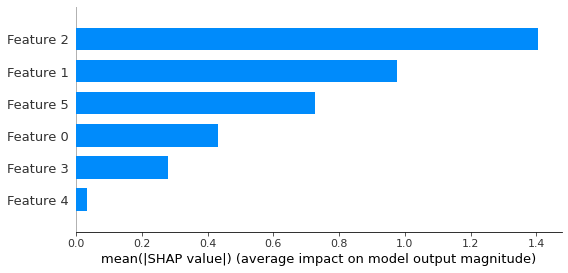

In [150]:
plt.figure(figsize = (15,8))
ax = shap.summary_plot(shap_values, 
                       df[var_num],
                       plot_type='bar',
                      title= 'Linear Regression - Feature Importance')
plt.show()

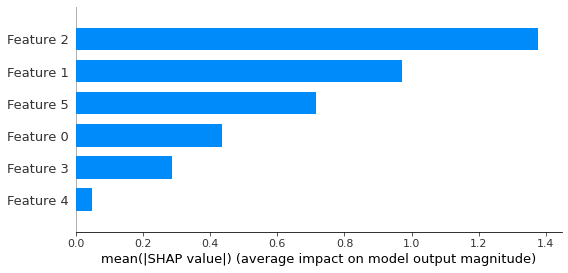

In [151]:
explainer_ridg = shap.Explainer(clf.predict, X_test)
shap_values_ridg = explainer_ridg(X_train)

plt.figure(figsize = (15,8))
ax = shap.summary_plot(shap_values_ridg, 
                       df[var_num],
                       plot_type='bar',
                      title= 'Ridge Regression - Feature Importance')
plt.show()

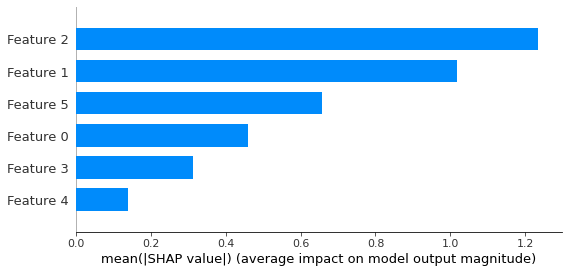

In [152]:
plt.figure(figsize = (20,8))
ax = shap.summary_plot(shap_values_SGDR, 
                      df[var_num],
                      plot_type='bar',
                      title= 'SGDR - Feature Importance')

plt.show()

## Análise das duas variáveis com maior importância: GPD per capta | Investimento Estrangeiro 

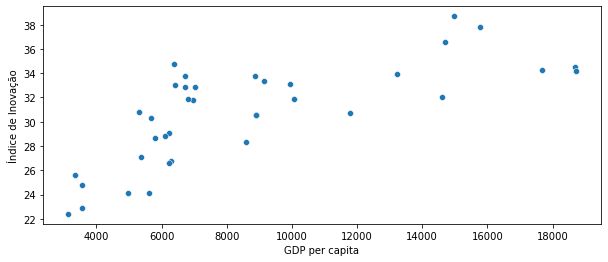

In [153]:
plt.figure(figsize = (10,4))

ax = sns.scatterplot(data=df, 
                     x='GDP per capita, current U.S. dollars', 
                     y='Innovations index (0-100)')

ax.set_xlabel('GDP per capita')
ax.set_ylabel('Índice de Inovação')

plt.show()

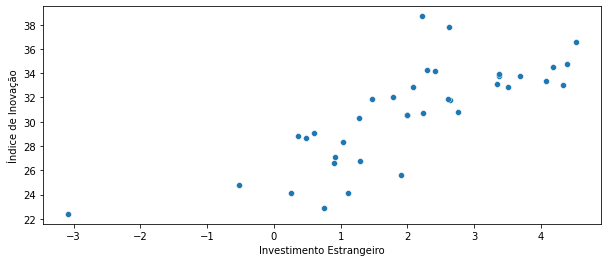

In [154]:
plt.figure(figsize = (10,4))

ax = sns.scatterplot(data=df, 
                     x='Foreign Direct Investment, percent of GDP', 
                     y='Innovations index (0-100)')

ax.set_xlabel('Investimento Estrangeiro')
ax.set_ylabel('Índice de Inovação')

plt.show()

In [155]:
X_train

array([[-8.15401347e-01, -1.18339982e+00, -7.35467758e-01,
        -2.18095353e+00,  1.22861482e+00, -1.55826938e+00],
       [-1.01925168e+00, -3.64441323e-01,  1.21123645e-01,
         5.21539725e-01, -8.06154580e-01, -2.57088214e-01],
       [-9.17326515e-01, -6.56787601e-01, -9.09362254e-01,
        -1.65619756e+00,  2.53960719e+00, -1.07032644e+00],
       [-8.15401347e-01, -5.35835015e-01, -3.87678767e-01,
        -1.02649039e+00,  8.25757793e-01, -2.80323592e-01],
       [ 2.03850337e+00,  3.20426326e-01,  9.32631290e-01,
        -5.30680636e-02, -1.12024650e+00, -2.33852836e-01],
       [ 0.00000000e+00, -8.48909288e-01, -1.05105406e+00,
        -5.30680636e-02,  1.04844148e-02, -9.77384930e-01],
       [-9.17326515e-01,  3.55235403e-01, -2.71749104e-01,
        -6.59161211e-01, -1.10659033e+00,  1.39262362e+00],
       [ 0.00000000e+00,  7.40403809e-02,  6.95993500e-02,
        -5.30680636e-02,  1.04844148e-02, -1.49905664e-03],
       [ 0.00000000e+00,  7.40403809e-02,  6.959

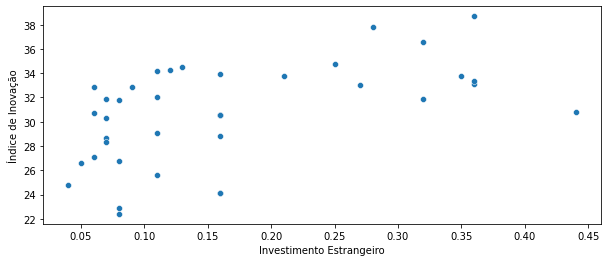

In [156]:
plt.figure(figsize = (10,4))

ax = sns.scatterplot(data=df, 
                     x='Information technology exports, percent of total goods exports', 
                     y='Innovations index (0-100)')

ax.set_xlabel('Investimento Estrangeiro')
ax.set_ylabel('Índice de Inovação')

plt.show()

In [157]:
var_num

['Information technology exports, percent of total goods exports',
 'GDP per capita, current U.S. dollars',
 'Foreign Direct Investment, percent of GDP',
 'Competitiveness - World Economic Forum index (0-100)',
 'Cost of starting a business, % of income per capita',
 'Human Development Index (0 - 1)']

In [161]:
import statsmodels.api as sm

#define response variable
y = df[var_targ]

#define predictor variables
x = df[var_num]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Innovations index (0-100)   R-squared:                       0.816
Model:                                   OLS   Adj. R-squared:                  0.782
Method:                        Least Squares   F-statistic:                     23.69
Date:                       Mon, 26 Sep 2022   Prob (F-statistic):           1.77e-10
Time:                               13:03:01   Log-Likelihood:                -75.856
No. Observations:                         39   AIC:                             165.7
Df Residuals:                             32   BIC:                             177.4
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
